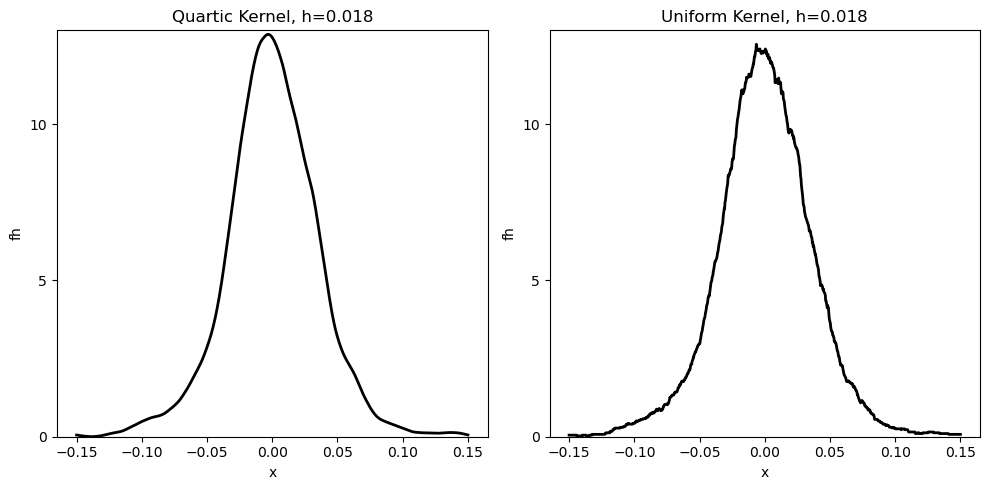

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from stockres.dat
data = np.loadtxt('stockres.dat')

# Bandwidth
h = 0.018

# Quartic (biweight) kernel function
def quartic_kernel(u):
    return 15/16 * (1 - u**2)**2 * (np.abs(u) <= 1)

# Uniform kernel function
def uniform_kernel(u):
    return 0.5 * (np.abs(u) <= 1)

# Kernel density estimation using the given kernel
def kde_kernel(x, data, bandwidth, kernel):
    n = len(data)
    return np.sum(kernel((x - data[:, None]) / bandwidth), axis=0) / (n * bandwidth)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5), facecolor='none')

# Generate x values for plotting
x_plot = np.linspace(-0.15, 0.15, 1000)

# Plot using the Quartic kernel
y_quartic = kde_kernel(x_plot, data, h, quartic_kernel)
axs[0].plot(x_plot, y_quartic, 'k-', linewidth=2)
axs[0].set_title(f'Quartic Kernel, h={h}')
axs[0].set_xlabel('x')
axs[0].set_ylabel('fh')
axs[0].set_yticks([0, 5, 10])
axs[0].set_ylim(0, 13)  # Set the y-axis limits to be the same for all subplots
axs[0].patch.set_alpha(0)  # Make the axis background transparent

# Plot using the Uniform kernel
y_uniform = kde_kernel(x_plot, data, h, uniform_kernel)
axs[1].plot(x_plot, y_uniform, 'k-', linewidth=2)
axs[1].set_title(f'Uniform Kernel, h={h}')
axs[1].set_xlabel('x')
axs[1].set_ylabel('fh')
axs[1].set_yticks([0, 5, 10])
axs[1].set_ylim(0, 13)  # Set the y-axis limits to be the same for all subplots
axs[1].patch.set_alpha(0)  # Make the axis background transparent

# Make the figure background transparent
fig.patch.set_alpha(0)

plt.tight_layout()
plt.show()
